## Carlos Eduardo Sabino 98894  
## Marcelo Henrique do Nascimento 98094

O dataset usado foi fornecido pela empresa Stilingue na SI/2021, entramos em contato com eles para pedir  
permissão para usá-lo, porém não nos responderam, dessa forma usamos a parte pública disponibilizada para os testes no próprio hackathon.

In [ ]:
# importando as bibliotecas necessárias para fazer as manipulações de dados

from nltk import word_tokenize
import nltk
nltk.download('stopwords')
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

from gensim import corpora, models, similarities
from nltk.probability import *

from sklearn.decomposition import PCA
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

from numpy import asarray
from numpy import zeros

import time 
import operator
from matplotlib import pyplot
from nltk.text import Text
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.util import ngrams
from numpy import array
import numpy as np
from numpy import zeros
from numpy import asarray
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
import nltk
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# lendo a planilha CSV com a biblioteca Pandas, e salvando como uma varíavel "train"
train = pd.read_csv("train.csv", index_col=0)

# exibindo o dataframe
train

,texto,sentimento
id,,
668,silvia descobrindo a existência da criança que...,1
306,saudades da minha novelinha laços de família e...,1
188,Estou achando Vereda Tropical tão chatinha. Ac...,-1
605,Mds a Dinah é muito burra #aviagemnogloboplay,-1
896,Conde é da zoeira!!! #AGataComeuNoGLOBOPLAY,1
...,...,...
945,"pronto, depois de laços de família que marat...",1
773,Atribuiria esse viés de esquerda ao Ricardo Li...,0
389,Celebridade/América/Mulheres Apaixonadas não d...,1


In [ ]:
#excluindo possiveis tweets duplicados
train.drop_duplicates(['texto'], inplace=True)

In [ ]:
# funcao de pre-processamento que elimina links e palavras sem muito valor para agregar ao modelo(ao,por,entao ....)
import re
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
pre_processed = [Preprocessing(i) for i in train['texto']]

In [ ]:
#quebra cada palavra em uma posicao de um array
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

X = vectorizer.fit_transform(pre_processed)
y = train['sentimento']


In [ ]:
#dividindo os dados em treino e teste na proporção 25% para teste e o restante para treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

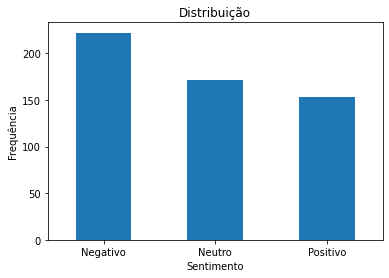

In [ ]:
#checando a distribuição de frequencia dos dados
import matplotlib.pyplot as plt
count_classes = pd.value_counts(y_train, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribuição")
plt.xticks(range(3),['Negativo','Neutro','Positivo'])
plt.xlabel("Sentimento")
plt.ylabel("Frequência");

In [ ]:
modelo = svm.SVC(C = 0.5, kernel='linear', probability=True, break_ties = False)
modelo.fit(X_train,y_train)

SVC(C=0.5, kernel='linear', probability=True)

# Resultado obtido para o conjunto de treino

Foi avaliado a acurácia e loss do modelo. Note que o modelo é razoavelmente melhor que jogar uma moeda, uma vez que teríamos 33% de precisão

In [ ]:
# gerando predições (inferências) com aquela parte do conjunto de treino

from sklearn.metrics import log_loss

predictions = modelo.predict(X_test)
probabilities = modelo.predict_proba(X_test)

loss = log_loss(y_test, probabilities)
accuracy = np.count_nonzero(predictions == y_test)/len(y_test)

print("Acurácia", accuracy)
print("Log Loss", loss)

Acurácia 0.5054945054945055
Log Loss 0.9918043481522328


# Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[16, 11, 11],
       [14, 22, 23],
       [15, 16, 54]])

# Cross Validation
Cross Validation é uma técnica muito utilizada para avaliação de desempenho de modelos de aprendizado de máquina. O CV consiste em particionar os dados em conjuntos(partes), onde um conjunto é utilizado para treino e outro conjunto é utilizado para teste e avaliação do desempenho do modelo. A utilização do CV tem altas chances de detectar se o seu modelo está sobreajustado aos seus dados de treinamento, ou seja, sofrendo overfitting. Note que houve uma pequena diferença para o resultado do modelo em apenas um conjunto de teste, porém o resultado ainda foi melhor que os 33% trivial.

In [ ]:
#cross-validation
resultados = cross_val_predict(modelo, X_test,y_test, cv=10)
metrics.accuracy_score(y_test,resultados)

0.44505494505494503